In [927]:
# import essential packages
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# Question 2

In [928]:
iris_data = datasets.load_iris()
one_dimensional_data = iris_data.data[:, 2:3]

## figure 1

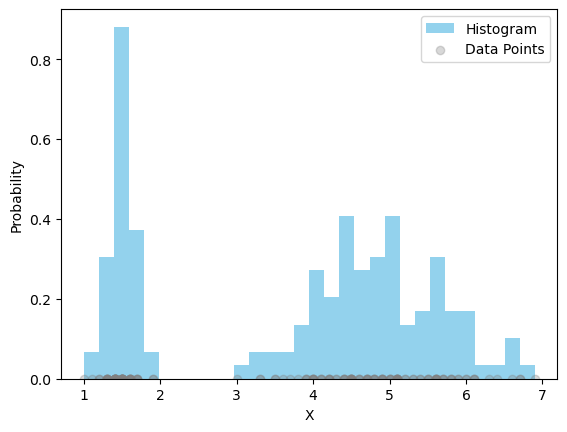

In [929]:
fig, ax = plt.subplots()
ax.hist(one_dimensional_data, bins=30, density=True, alpha=0.9, color='skyblue', label='Histogram')
ax.scatter(one_dimensional_data, np.zeros_like(one_dimensional_data), alpha=0.3, color='grey', label="Data Points")
ax.set_ylabel("Probability")
ax.set_xlabel("X")
ax.legend()
plt.show()

## figure 2

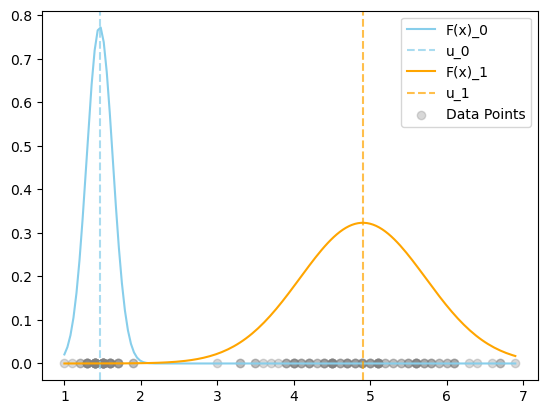

In [930]:
# model
mix_gmm = GaussianMixture(n_components=2, random_state=0)
mix_gmm.fit(one_dimensional_data)


# plot
x_axis = np.linspace(min(one_dimensional_data), max(one_dimensional_data), 150).reshape(-1, 1)

# calculate likelihoods
likehoods = mix_gmm.score_samples(one_dimensional_data)
# Plot initial component functions
fig, ax = plt.subplots()
colors = ['skyblue', 'orange']
for i in range(mix_gmm.n_components):
    mean = mix_gmm.means_[i][0]
    cov = np.sqrt(mix_gmm.covariances_[i])[0][0]
    ax.plot(x_axis, mix_gmm.weights_[i] * np.exp(-0.5 * ((x_axis - mean) / cov) ** 2) / (cov * np.sqrt(2 * np.pi)), label=f'F(x)_{i}', color=colors[i])
    ax.axvline(x=mean, linestyle='--', color=colors[i], alpha=0.7, label=f"u_{i}")

ax.scatter(one_dimensional_data, np.zeros_like(one_dimensional_data), alpha=0.3, color='grey', label="Data Points")
ax.legend()
    
plt.show()

## figure 3

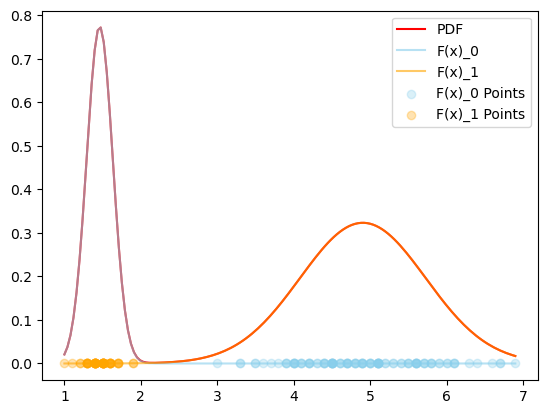

In [931]:
# pdf
fig, ax = plt.subplots()

mean_0 = mix_gmm.means_[0][0]
cov_0 = np.sqrt(mix_gmm.covariances_[0])[0][0]
mean_1 = mix_gmm.means_[1][0]
cov_1 = np.sqrt(mix_gmm.covariances_[1])[0][0]
pdf = (mix_gmm.weights_[0] * np.exp(-0.5 * ((x_axis - mean_0) / cov_0) ** 2)/ ( cov_0 * np.sqrt(2 * np.pi))) + (mix_gmm.weights_[1] * np.exp(-0.5 * ((x_axis - mean_1) / cov_1) ** 2)/ ( cov_1 * np.sqrt(2 * np.pi)))
ax.plot(x_axis, pdf, label="PDF", color='red')
colors = ['skyblue', 'orange']
for i in range(mix_gmm.n_components):
    mean = mix_gmm.means_[i][0]
    cov = np.sqrt(mix_gmm.covariances_[i])[0][0]
    ax.plot(x_axis, mix_gmm.weights_[i] * np.exp(-0.5 * ((x_axis - mean) / cov) ** 2) / (cov * np.sqrt(2 * np.pi)), label=f'F(x)_{i}', color=colors[i], alpha=0.6)
ax.scatter(one_dimensional_data[one_dimensional_data>=2], np.zeros_like(one_dimensional_data[one_dimensional_data>=3]), alpha=0.3, color=colors[0], label="F(x)_0 Points")
ax.scatter(one_dimensional_data[one_dimensional_data<2], np.zeros_like(one_dimensional_data[one_dimensional_data<3]), alpha=0.3, color=colors[1], label="F(x)_1 Points")
ax.legend()
plt.show()

## figure 4

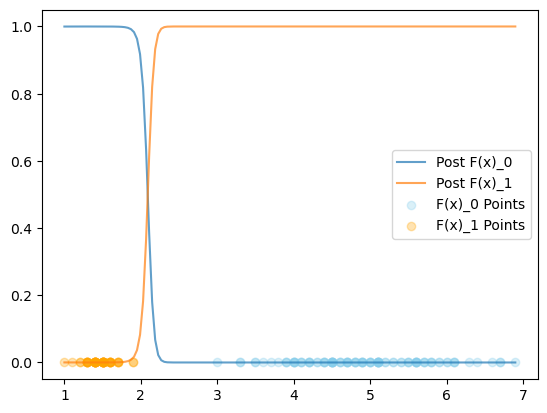

In [932]:
fig, ax = plt.subplots()
posterior_probs = mix_gmm.predict_proba(x_axis)
ax.plot(x_axis, posterior_probs[:, 0], alpha=0.7, label="Post F(x)_0")
ax.plot(x_axis, posterior_probs[:, 1], alpha=0.7, label="Post F(x)_1")
ax.scatter(one_dimensional_data[one_dimensional_data>=2], np.zeros_like(one_dimensional_data[one_dimensional_data>=2]), alpha=0.3, color=colors[0], label="F(x)_0 Points")
ax.scatter(one_dimensional_data[one_dimensional_data<2], np.zeros_like(one_dimensional_data[one_dimensional_data<2]), alpha=0.3, color=colors[1], label="F(x)_1 Points")
ax.legend()
plt.show()

## figure 5

In [933]:
mix_gmm.covariances_

array([[[0.02946712]],

       [[0.67768389]]])

L is -360.3913290322422
L is -362.571117664333
L is -363.28701406651044
L is -363.4985209013205
L is -363.5566901536976
L is -363.5722642391451
L is -363.57640071816627
L is -363.57749693739987
L is -363.5777872765326
L is -363.577864162124
L is -363.5778845215768
L is -363.5778899127391


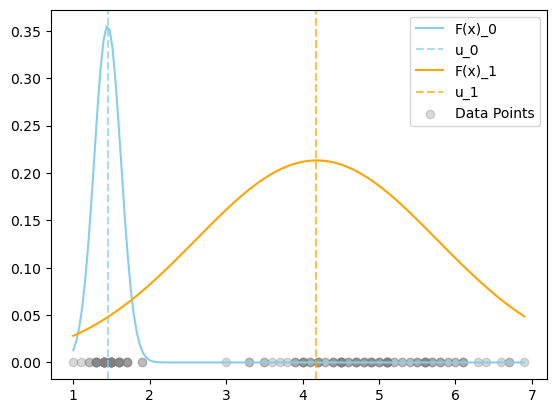

In [934]:
# EM iteration
L_list = []
u_1_list = []
u_2_list = []
weight_1_list = []
weight_2_list = []
std_1_list = []
std_2_list = []

for i in range(12):
    

    # M步骤
    mix_gmm.weights_ = np.sum(posterior_probs, axis=0) / len(one_dimensional_data)

    mix_gmm.means_ = (np.sum(posterior_probs[:,:] * one_dimensional_data, axis=0) / np.sum(posterior_probs, axis=0)).reshape(2,1)
    
    tem_list = []
    for i,j in zip((one_dimensional_data - mix_gmm.means_[0])**2, (one_dimensional_data - mix_gmm.means_[1])**2):
        tem_list.append([i[0], j[0]])

    tem_result = np.array(tem_list)
    
    mix_gmm.covariances_ = np.sum(posterior_probs[:,:] * tem_result, axis=0) / np.sum(posterior_probs, axis=0)

    # E步骤
    posterior_probs = mix_gmm.predict_proba(x_axis)
    print(f"L is {np.sum(mix_gmm.score_samples(x_axis))}")
    L_list.append(np.sum(mix_gmm.score_samples(x_axis)))
    u_1_list.append(mix_gmm.means_[0][0])
    u_2_list.append(mix_gmm.means_[1][0])
    weight_1_list.append(mix_gmm.weights_[0])
    weight_2_list.append(mix_gmm.weights_[1])
    std_1_list.append(np.sqrt(mix_gmm.covariances_[0]))
    std_2_list.append(np.sqrt(mix_gmm.covariances_[1]))

# Plot initial component functions
fig, ax = plt.subplots()
colors = ['skyblue', 'orange']
for i in range(mix_gmm.n_components):
    mean = mix_gmm.means_[i][0]
    cov = np.sqrt(mix_gmm.covariances_[i])
    ax.plot(x_axis, mix_gmm.weights_[i] * np.exp(-0.5 * ((x_axis - mean) / cov) ** 2) / (cov * np.sqrt(2 * np.pi)), label=f'F(x)_{i}', color=colors[i])
    ax.axvline(x=mean, linestyle='--', color=colors[i], alpha=0.7, label=f"u_{i}")

ax.scatter(one_dimensional_data, np.zeros_like(one_dimensional_data), alpha=0.3, color='grey', label="Data Points")
ax.legend()
    
plt.show()

# figure 6

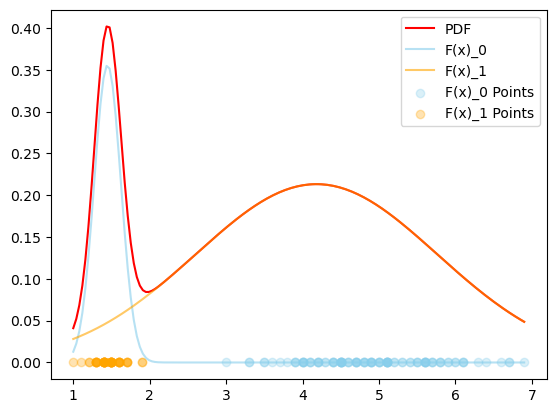

In [935]:
fig, ax = plt.subplots()

mean_0 = mix_gmm.means_[0][0]
cov_0 = np.sqrt(mix_gmm.covariances_[0])
mean_1 = mix_gmm.means_[1][0]
cov_1 = np.sqrt(mix_gmm.covariances_[1])
pdf = (mix_gmm.weights_[0] * np.exp(-0.5 * ((x_axis - mean_0) / cov_0) ** 2)/ ( cov_0 * np.sqrt(2 * np.pi))) + (mix_gmm.weights_[1] * np.exp(-0.5 * ((x_axis - mean_1) / cov_1) ** 2)/ ( cov_1 * np.sqrt(2 * np.pi)))
ax.plot(x_axis, pdf, label="PDF", color='red')
colors = ['skyblue', 'orange']
for i in range(mix_gmm.n_components):
    mean = mix_gmm.means_[i][0]
    cov = np.sqrt(mix_gmm.covariances_[i])
    ax.plot(x_axis, mix_gmm.weights_[i] * np.exp(-0.5 * ((x_axis - mean) / cov) ** 2) / (cov * np.sqrt(2 * np.pi)), label=f'F(x)_{i}', color=colors[i], alpha=0.6)
ax.scatter(one_dimensional_data[one_dimensional_data>=2], np.zeros_like(one_dimensional_data[one_dimensional_data>=3]), alpha=0.3, color=colors[0], label="F(x)_0 Points")
ax.scatter(one_dimensional_data[one_dimensional_data<2], np.zeros_like(one_dimensional_data[one_dimensional_data<3]), alpha=0.3, color=colors[1], label="F(x)_1 Points")
ax.legend()
plt.show()

# figure 7

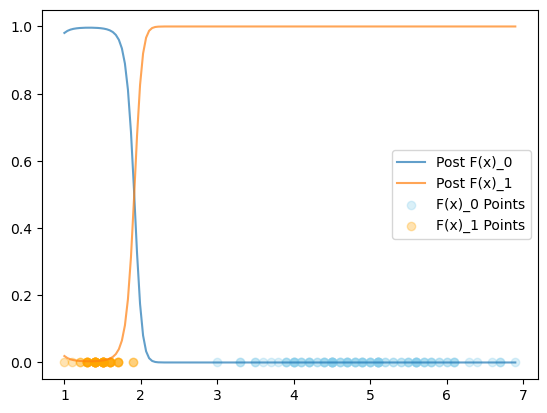

In [936]:
fig, ax = plt.subplots()
ax.plot(x_axis, posterior_probs[:, 0], alpha=0.7, label="Post F(x)_0")
ax.plot(x_axis, posterior_probs[:, 1], alpha=0.7, label="Post F(x)_1")
ax.scatter(one_dimensional_data[one_dimensional_data>=2], np.zeros_like(one_dimensional_data[one_dimensional_data>=2]), alpha=0.3, color=colors[0], label="F(x)_0 Points")
ax.scatter(one_dimensional_data[one_dimensional_data<2], np.zeros_like(one_dimensional_data[one_dimensional_data<2]), alpha=0.3, color=colors[1], label="F(x)_1 Points")
ax.legend()
plt.show()

## figure 8

L is -363.5778913403093
L is -363.577891718327
L is -363.5778918184253
L is -363.5778918449312
L is -363.57789185194974
L is -363.57789185380835
L is -363.57789185430056
L is -363.57789185443073
L is -363.5778918544653
L is -363.5778918544745
L is -363.5778918544769
L is -363.5778918544775
L is -363.5778918544777
L is -363.5778918544777
L is -363.57789185447774
L is -363.57789185447774
L is -363.57789185447774
L is -363.5778918544777
L is -363.5778918544777
L is -363.5778918544777
L is -363.5778918544777
L is -363.5778918544777
L is -363.5778918544777
L is -363.5778918544777


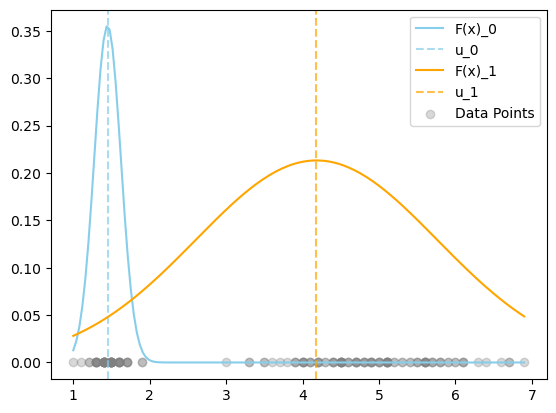

In [937]:
# EM iteration
for i in range(24):
    

    # M步骤
    mix_gmm.weights_ = np.sum(posterior_probs, axis=0) / len(one_dimensional_data)

    mix_gmm.means_ = (np.sum(posterior_probs[:,:] * one_dimensional_data, axis=0) / np.sum(posterior_probs, axis=0)).reshape(2,1)
    
    tem_list = []
    for i,j in zip((one_dimensional_data - mix_gmm.means_[0])**2, (one_dimensional_data - mix_gmm.means_[1])**2):
        tem_list.append([i[0], j[0]])

    tem_result = np.array(tem_list)
    
    mix_gmm.covariances_ = np.sum(posterior_probs[:,:] * tem_result, axis=0) / np.sum(posterior_probs, axis=0)

    # E步骤
    posterior_probs = mix_gmm.predict_proba(x_axis)
    print(f"L is {np.sum(mix_gmm.score_samples(x_axis))}")
    L_list.append(np.sum(mix_gmm.score_samples(x_axis)))
    u_1_list.append(mix_gmm.means_[0][0])
    u_2_list.append(mix_gmm.means_[1][0])
    weight_1_list.append(mix_gmm.weights_[0])
    weight_2_list.append(mix_gmm.weights_[1])
    std_1_list.append(np.sqrt(mix_gmm.covariances_[0]))
    std_2_list.append(np.sqrt(mix_gmm.covariances_[1]))


# Plot initial component functions
fig, ax = plt.subplots()
colors = ['skyblue', 'orange']
for i in range(mix_gmm.n_components):
    mean = mix_gmm.means_[i][0]
    cov = np.sqrt(mix_gmm.covariances_[i])
    ax.plot(x_axis, mix_gmm.weights_[i] * np.exp(-0.5 * ((x_axis - mean) / cov) ** 2) / (cov * np.sqrt(2 * np.pi)), label=f'F(x)_{i}', color=colors[i])
    ax.axvline(x=mean, linestyle='--', color=colors[i], alpha=0.7, label=f"u_{i}")

ax.scatter(one_dimensional_data, np.zeros_like(one_dimensional_data), alpha=0.3, color='grey', label="Data Points")
ax.legend()
    
plt.show()

## figure 9

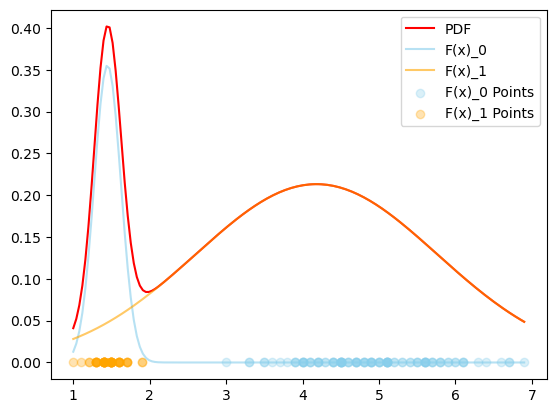

In [938]:
fig, ax = plt.subplots()

mean_0 = mix_gmm.means_[0][0]
cov_0 = np.sqrt(mix_gmm.covariances_[0])
mean_1 = mix_gmm.means_[1][0]
cov_1 = np.sqrt(mix_gmm.covariances_[1])
pdf = (mix_gmm.weights_[0] * np.exp(-0.5 * ((x_axis - mean_0) / cov_0) ** 2)/ ( cov_0 * np.sqrt(2 * np.pi))) + (mix_gmm.weights_[1] * np.exp(-0.5 * ((x_axis - mean_1) / cov_1) ** 2)/ ( cov_1 * np.sqrt(2 * np.pi)))
ax.plot(x_axis, pdf, label="PDF", color='red')
colors = ['skyblue', 'orange']
for i in range(mix_gmm.n_components):
    mean = mix_gmm.means_[i][0]
    cov = np.sqrt(mix_gmm.covariances_[i])
    ax.plot(x_axis, mix_gmm.weights_[i] * np.exp(-0.5 * ((x_axis - mean) / cov) ** 2) / (cov * np.sqrt(2 * np.pi)), label=f'F(x)_{i}', color=colors[i], alpha=0.6)
ax.scatter(one_dimensional_data[one_dimensional_data>=2], np.zeros_like(one_dimensional_data[one_dimensional_data>=3]), alpha=0.3, color=colors[0], label="F(x)_0 Points")
ax.scatter(one_dimensional_data[one_dimensional_data<2], np.zeros_like(one_dimensional_data[one_dimensional_data<3]), alpha=0.3, color=colors[1], label="F(x)_1 Points")
ax.legend()
plt.show()

## figure 10

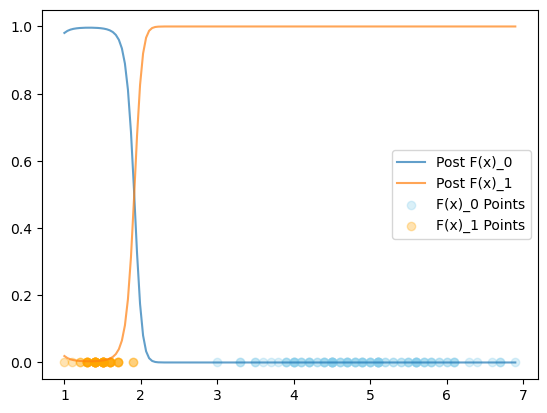

In [939]:
fig, ax = plt.subplots()
ax.plot(x_axis, posterior_probs[:, 0], alpha=0.7, label="Post F(x)_0")
ax.plot(x_axis, posterior_probs[:, 1], alpha=0.7, label="Post F(x)_1")
ax.scatter(one_dimensional_data[one_dimensional_data>=2], np.zeros_like(one_dimensional_data[one_dimensional_data>=2]), alpha=0.3, color=colors[0], label="F(x)_0 Points")
ax.scatter(one_dimensional_data[one_dimensional_data<2], np.zeros_like(one_dimensional_data[one_dimensional_data<2]), alpha=0.3, color=colors[1], label="F(x)_1 Points")
ax.legend()
plt.show()

## figure 11

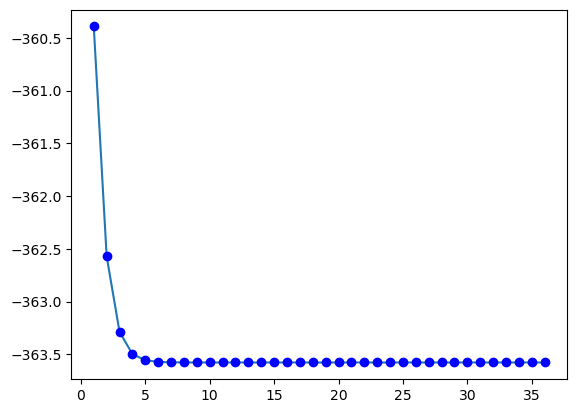

In [940]:
fig, ax = plt.subplots()
ax.plot(range(1, 37), L_list)
ax.plot(range(1, 37), L_list, 'bo')

## figure 12

Text(0.5, 1.0, 'Weight')

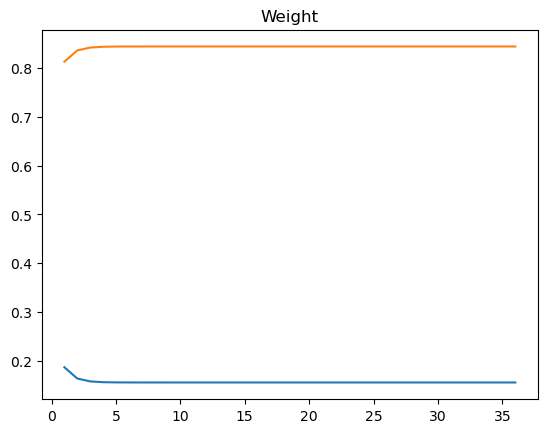

In [941]:
# weight
fig, ax = plt.subplots()
ax.plot(range(1, 37), weight_1_list)
ax.plot(range(1, 37), weight_2_list)
ax.set_title("Weight")

## figure 13

Text(0.5, 1.0, 'Mean')

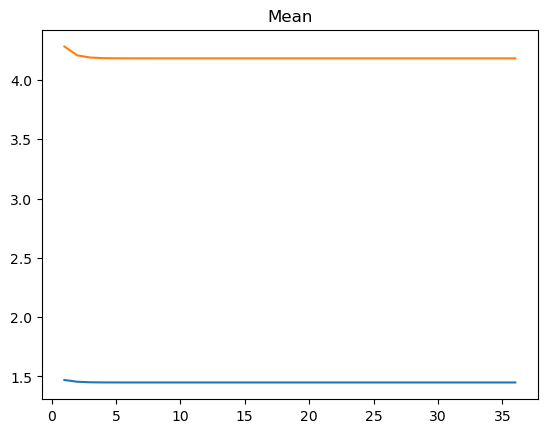

In [942]:
# mean
fig, ax = plt.subplots()
ax.plot(range(1, 37), u_1_list)
ax.plot(range(1, 37), u_2_list)
ax.set_title("Mean")

## figure 14

Text(0.5, 1.0, 'Std')

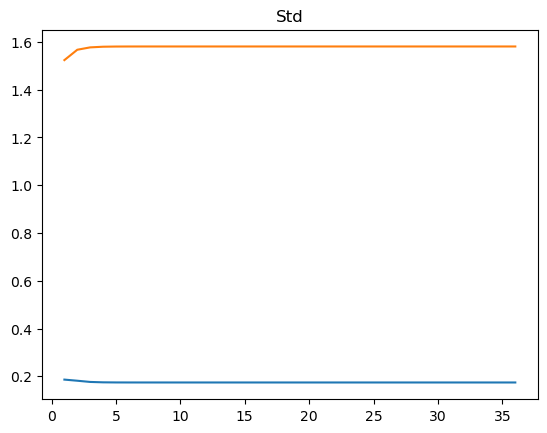

In [943]:
# std
fig, ax = plt.subplots()
ax.plot(range(1, 37), std_1_list)
ax.plot(range(1, 37), std_2_list)
ax.set_title("Std")

# Question 1

## figure 15

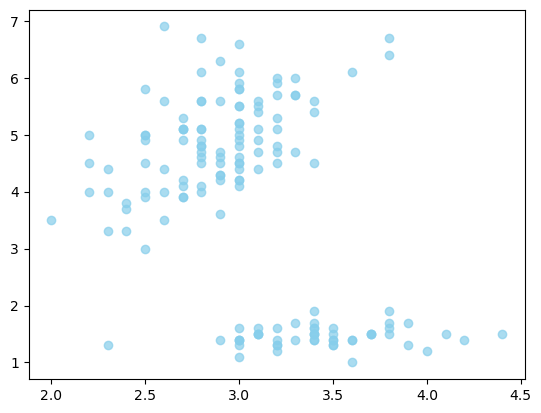

In [944]:
two_dimension_data = iris_data.data[:, 1:3]
fig, ax = plt.subplots()
ax.scatter(two_dimension_data[:, 0], two_dimension_data[:, 1], c='skyblue', alpha=0.7)

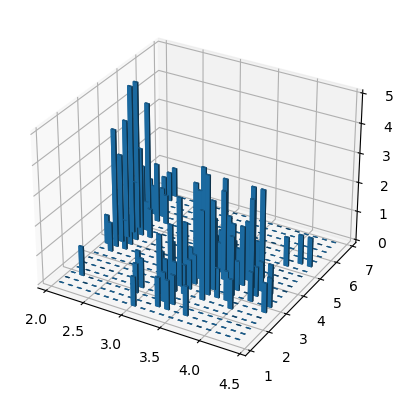

In [945]:
hist, x_edges, y_edges = np.histogram2d(two_dimension_data[:, 0], two_dimension_data[:, 1], bins=(20, 20))
x_centers = (x_edges[:-1] + x_edges[1:]) / 2
y_centers = (y_edges[:-1] + y_edges[1:]) / 2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_data, y_data = np.meshgrid(x_centers, y_centers)
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = np.zeros_like(x_data)

dx = dy = 0.5 * (x_centers[1] - x_centers[0])
dz = hist.flatten()

ax.bar3d(x_data, y_data, z_data, dx, dy, dz, shade=True)

plt.show()

## figure 16

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


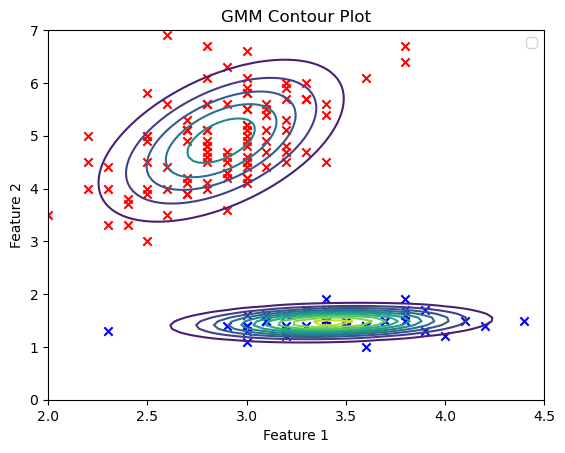

In [946]:
# 拟合模型
gmm = GaussianMixture(n_components=2)
gmm.fit(two_dimension_data)

# 网格点
x, y = np.meshgrid(np.linspace(2, 4.5, 100), np.linspace(0, 7, 100))
points = np.column_stack([x.ravel(), y.ravel()])

pdf = np.zeros_like(x)
for i in range(gmm.n_components):
    pdf_component = gmm.weights_[i] * multivariate_normal.pdf(points, mean=gmm.means_[i], cov=gmm.covariances_[i])
    pdf += pdf_component.reshape(pdf.shape)

# 等高线
plt.contour(x, y, pdf, levels=10, cmap="viridis")

tmp_data_1 = two_dimension_data[two_dimension_data[:, 1] > 2]
tmp_data_2 = two_dimension_data[two_dimension_data[:, 1] <= 2]

plt.scatter(tmp_data_1[:, 0], tmp_data_1[:, 1], c='red', marker='x')
plt.scatter(tmp_data_2[:, 0], tmp_data_2[:, 1], c='blue', marker='x')

plt.title('GMM Contour Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## figure 17

### 图17和图18不知道为什么有时候会报错，有时候又能运行，如果报错麻烦点击“Run All”多试几次，谢谢

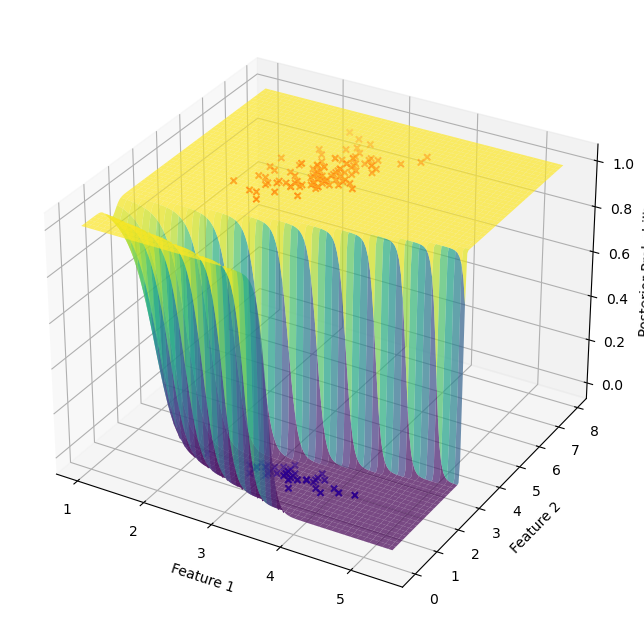

In [947]:
# 计算后验概率
posterior_probs = gmm.predict_proba(two_dimension_data)

x_min, x_max = two_dimension_data[:, 0].min() - 1, two_dimension_data[:, 0].max() + 1
y_min, y_max = two_dimension_data[:, 1].min() - 1, two_dimension_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150), np.linspace(y_min, y_max, 150))

# 计算每个网格点上的后验概率
grid_points = np.column_stack((xx.ravel(), yy.ravel()))
grid_posterior_probs = gmm.predict_proba(grid_points)

# 将后验概率曲面的数据调整为 (150, 150, 2)
grid_posterior_probs_3d = grid_posterior_probs.reshape((150, 150, 2))

# 绘制3D曲面
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, grid_posterior_probs_3d[:, :, 0], cmap="viridis", alpha=0.7)

tmp_data_1 = two_dimension_data[two_dimension_data[:, 1] > 2]
tmp_data_2 = two_dimension_data[two_dimension_data[:, 1] <= 2]
tmp_data_3 = posterior_probs[posterior_probs[:, 1] > 0.5]
tmp_data_4 = posterior_probs[posterior_probs[:, 1] <= 0.5]
# 绘制样本点
ax.scatter(tmp_data_1[:, 0], tmp_data_1[:, 1], tmp_data_4[:, 0], c='red', marker='x')
ax.scatter(tmp_data_2[:, 0], tmp_data_2[:, 1], tmp_data_3[:, 0], c='blue', marker='x')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Posterior Probability')

plt.show()

## figure 18

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


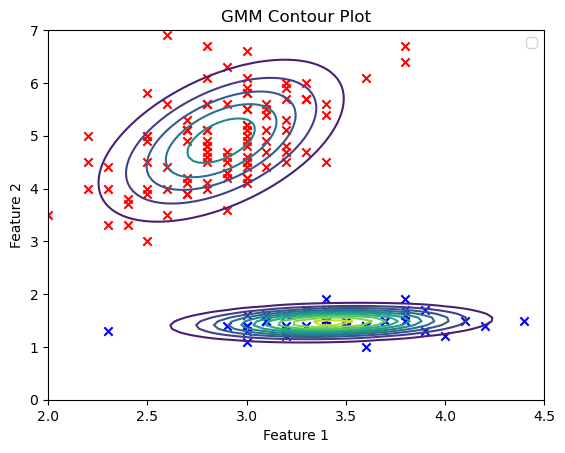

In [948]:
x, y = np.meshgrid(np.linspace(2, 4.5, 100), np.linspace(0, 7, 100))
points = np.column_stack([x.ravel(), y.ravel()])
pdf = np.zeros_like(x)
for i in range(gmm.n_components):
    pdf_component = gmm.weights_[i] * multivariate_normal.pdf(points, mean=gmm.means_[i], cov=gmm.covariances_[i])
    pdf += pdf_component.reshape(pdf.shape)

for i in range(12):

    # M步骤
    gmm.weights_ = np.sum(posterior_probs, axis=0) / len(two_dimension_data)

    gmm.means_ = (np.sum(posterior_probs[:,:] * two_dimension_data, axis=0) / np.sum(posterior_probs, axis=0)).reshape(2,1)
    
    tem_list = []
    for i,j in zip((two_dimension_data - gmm.means_[0])**2, (two_dimension_data - gmm.means_[1])**2):
        tem_list.append([i[0], j[0]])

    tem_result = np.array(tem_list)
    
    gmm.covariances_ = np.sum(posterior_probs[:,:] * tem_result, axis=0) / np.sum(posterior_probs, axis=0)

# 等高线
plt.contour(x, y, pdf, levels=10, cmap="viridis")

tmp_data_1 = two_dimension_data[two_dimension_data[:, 1] > 2]
tmp_data_2 = two_dimension_data[two_dimension_data[:, 1] <= 2]

plt.scatter(tmp_data_1[:, 0], tmp_data_1[:, 1], c='red', marker='x')
plt.scatter(tmp_data_2[:, 0], tmp_data_2[:, 1], c='blue', marker='x')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()